# **가위바위보 분류기**

In [192]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.13.0
1.24.3


### **데이터 불러오기 + Resize 하기**

In [193]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [194]:
# 224x224이미지를 28*28로 변환
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.path.join(os.getenv("HOME"), "Coding", "aiffel", "projects", "MainQuest03", "rock_scissor_paper", "scissor")
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.path.join(os.getenv("HOME"), "Coding", "aiffel", "projects", "MainQuest03", "rock_scissor_paper", "rock")
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.path.join(os.getenv("HOME"), "Coding", "aiffel", "projects", "MainQuest03", "rock_scissor_paper", "paper")
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/ipykernel_52755/3222125731.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


In [195]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.path.join(os.getenv("HOME"), "Coding", "aiffel", "projects", "MainQuest03", "rock_scissor_paper")
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


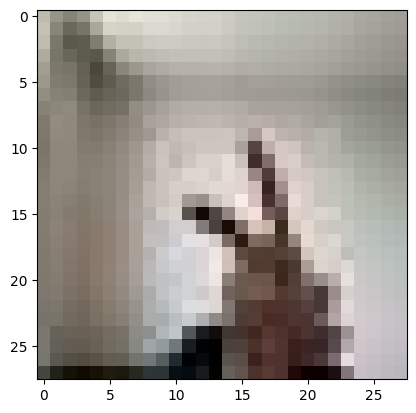

In [196]:
import matplotlib.pyplot as plt


plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [197]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_17 (Flatten)        (None, 800)               0         
                                                                 
 dense_34 (Dense)            (None, 32)              

Trainable params: 30819 (120.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
# 모델 컴파일
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

test_image_dir_path = os.path.join(os.getenv("HOME"), "Coding", "aiffel", "projects", "MainQuest03", "rock_scissor_paper")
(x_test, y_test) = load_data(test_image_dir_path)

x_test_norm = x_test / 255.0
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

# 모델 학습
model.fit(x_train_norm, y_train, epochs=15)

# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"테스트 데이터의 손실 값: {test_loss}")
print(f"테스트 데이터의 정확도: {test_accuracy}")

학습데이터(x_train)의 이미지 개수는 300 입니다.
10/10 - 0s - loss: 1.1061 - accuracy: 0.3733 - 98ms/epoch - 10ms/step
Epoch 1/15
10/10 [==============================] - 0s 3ms/step - loss: 1.0853 - accuracy: 0.4167
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 1.0449 - accuracy: 0.5033
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 0.9702 - accuracy: 0.6167
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 0.8455 - accuracy: 0.7467
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.7633
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: 0.5707 - accuracy: 0.8300
Epoch 7/15
10/10 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.8533
Epoch 8/15
10/10 [==============================] - 0s 3ms/step - loss: 0.3457 - accuracy: 0.9200
Epoch 9/15
10/10 [==============================] - 0s 3ms/step - loss: 0.2652 - accuracy: 0.9433
Epoch 10/15
10/

In [199]:

# 테스트 데이터셋 준비
test_image_dir_path = os.path.join(os.getenv("HOME"), "Coding", "aiffel", "projects", "MainQuest03", "rock_scissor_paper", "test_rock_scissor_paper", "testScissor")
resize_images(test_image_dir_path)

test_image_dir_path = os.path.join(os.getenv("HOME"), "Coding", "aiffel", "projects", "MainQuest03", "rock_scissor_paper", "test_rock_scissor_paper", "testRock")
resize_images(test_image_dir_path)

test_image_dir_path = os.path.join(os.getenv("HOME"), "Coding", "aiffel", "projects", "MainQuest03", "rock_scissor_paper", "test_rock_scissor_paper", "testPaper")
resize_images(test_image_dir_path)

test_image_dir_path = os.path.join(os.getenv("HOME"), "Coding", "aiffel", "projects", "MainQuest03", "rock_scissor_paper", "test_rock_scissor_paper")
(x_test, y_test) = load_data(test_image_dir_path)
x_test_norm = x_test/255.0


100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 0 입니다.


/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/ipykernel_52755/3222125731.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


In [200]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"테스트 데이터의 손실 값: {test_loss}")
print(f"테스트 데이터의 정확도: {test_accuracy}")

10/10 - 0s - loss: 1.2062 - accuracy: 0.0000e+00 - 25ms/epoch - 2ms/step
테스트 데이터의 손실 값: 1.206199049949646
테스트 데이터의 정확도: 0.0
